In [1]:
using Plots
using LaTeXStrings

# List II
# Lucas Schmidt Ferreira de Araujo

# Exercice I

We have the problem

$$ \pi - x + \frac{1}{2} sin(\frac{x}{2}) = 0, \quad x \in [0,2\pi] $$

which we may rewrite as 

$$ x = \pi + \frac{1}{2} sin(\frac{x}{2}) $$

such that 

$$ x = f(x) , \quad f(x) = \pi + \frac{1}{2} sin(\frac{x}{2}) $$

We know that

$$ |f^{\prime}(x)| = \frac{1}{4} cos(\frac{x}{2}) \leq k < 1$$

Then, we can apply the Banach Fixed-Point theorem. The equation has therefore an unique solution which can be approximated by the iterative scheme

$$ x_{n+1} = f(x_n) $$

given an initial value $x_0$

In [2]:
### Functions
function f(x)
    return pi + .5 * sin(x/2)
end

### Parameters
n = 20      ## Number of Iterations
x0 = 0      ## Initial Value
k = .25     ## k-contraction constant
acc = .01   ## Accuracy tolerance

### Domain
r = range(0,2*pi,n)
values = zeros(n)
values[1] = x0

### Fix-Point Iteration
for q in 1:n-1
    values[q+1] = f(values[q])
end

### Error and Iterations estimations
init_err = abs(values[2] - values[1])
n_est = (log(acc) + log(1-k) - log(init_err)) / log(k)

### Results
println("Number of iterations: $(n)")
println("Initial value x0: $(x0)")
println("Best approximation: $(values[end])")

Number of iterations: 20
Initial value x0: 0
Best approximation: 3.6269420148715734


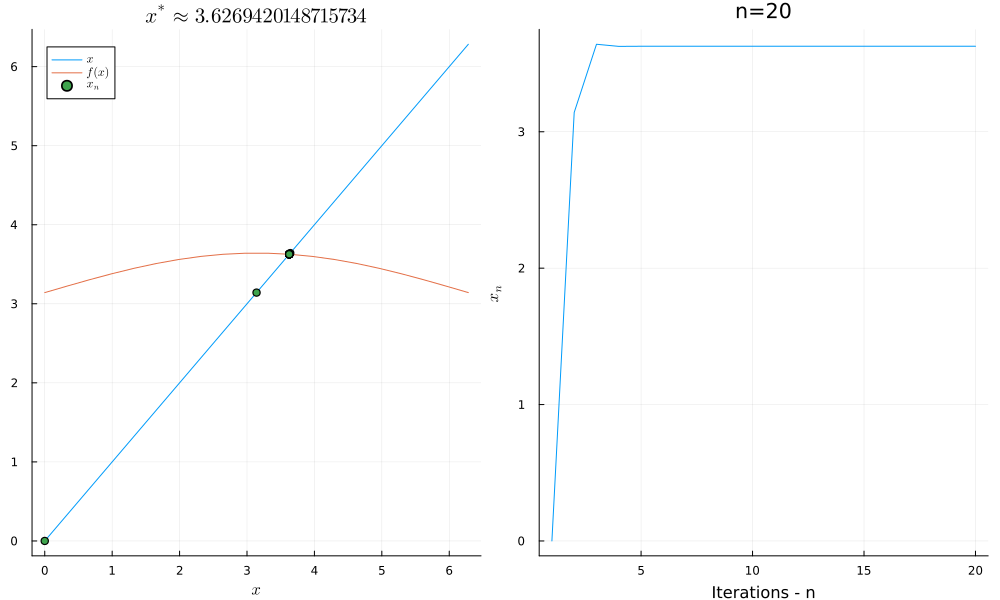

In [3]:
plot1 = plot(r,r,label=L"x" , xlabel = L"x" , title = L"x^{*} \approx 3.6269420148715734")
plot!(r,f.(r),label=L"f(x)")
scatter!(values,values,label=L"x_n")

plot2 = plot(1:n,values,label=false , title = "n=$(n)",xlabel = "Iterations - n" , ylabel = L"x_{n}")
plot(plot1 , plot2 , layout = (1,2) , size=(1000, 600))

## Error and iterations estimations

The number of iterations for achieving a given accuracy may be given by the so-called a priori error estimate for all $n = 0,1,2,...$
 
$$ || u_n - u || \leq k^n(1-k)^{-1} || u_1 - u_0 || < \epsilon , \quad \epsilon = 10^{-2}$$


Then

$$  n \ln(k) - \ln(1-k) + \ln(|| u_1 - u_0 ||) < \ln(\epsilon)$$

$$ n < O(\epsilon) = \frac{\ln(\epsilon) + \ln(1-k) - \ln(|| u_1 - u_0 ||)}{\ln(k)} , \quad 0 \leq k < 1$$

Also, we recall from the previous result that

$$ |f^{\prime}(x)| = \frac{1}{4} cos(\frac{x}{2}) \leq k < 1 , \quad x \in [0,2\pi]$$

which implies that, 

$$ \frac{1}{4} \leq k$$

In [4]:
println("Accuracy: $(acc)")
println("O(ϵ) = $(n_est)")
println("Estimated number of necessary iterations = $(trunc(Int,n_est-1))")

Accuracy: 0.01
O(ϵ) = 4.355194909262943
Estimated number of necessary iterations = 3


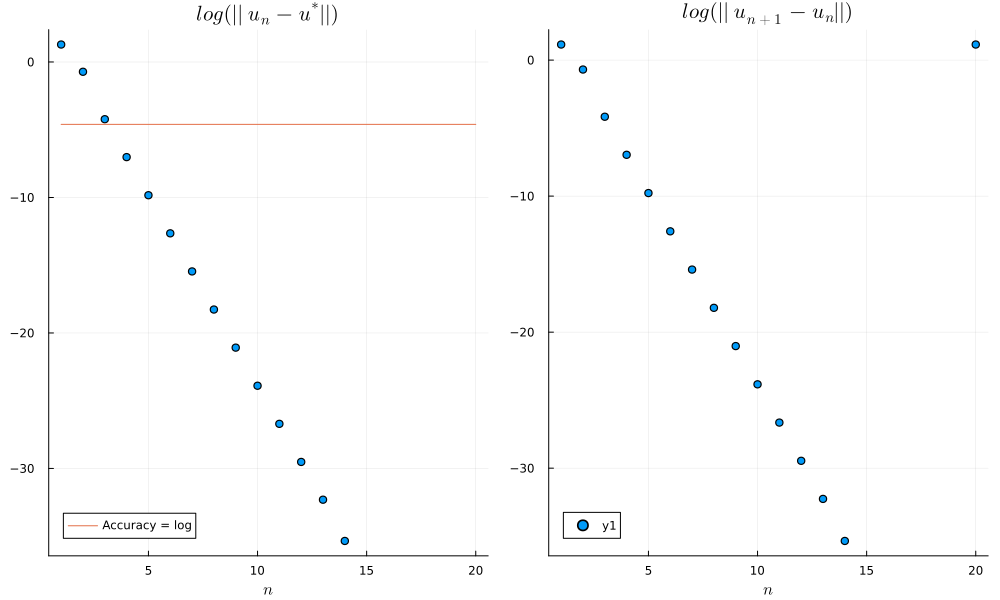

In [5]:
err1 = zeros(n)
err2 = zeros(n-1)

err1 .= abs.( values[end] .- values ) 
err2 .= abs.(values[2:end] .- values[1:end-1])

plot1 = scatter(1:n , log.(err1) , xlabel = L"n" , title = L" log( || u_n - u^{*} || )" , label = false)
plot!(1:n, ones(n) * log(acc) , label = "Accuracy = log( 10^{-2} )")

plot2 = scatter(1:n , log.(err2) ,  xlabel = L"n" , title =L" log( || u_{n+1} - u_n || )")
plot(plot1,plot2,layout=(1,2),size=(1000,600))

# Exercice II

a) Apply Newton's method to solve

$$ x^2 - p = 0, \quad p > 0$$ 

Newton's method is described by

$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f^{\prime}(x_n)} $$

for an initial guess $x_0$

In [6]:
### Functions
function f(x)
    return x^2 -p
end

function f_(x)
    return 2*x
end

### Parameters
p = 2       ## Value of p
n = 5       ## Number of Iterations
x0 = 1      ## Initial Condtition

### Memory Alocation
x = range(0,3,100)
values = zeros(n)

# Newton-Raphson Iteration
values[1] = x0
for q in 1:n-1
    values[q+1] = values[q] - f(values[q]) / f_(values[q])
end

println("Solution by Newton-Raphson Method: $(values[end])")
println("Solution: $(sqrt(p))")
println("Error: $(abs(sqrt(p) - values[end]))")

Solution by Newton-Raphson Method: 1.4142135623746899
Solution: 1.4142135623730951
Error: 1.5947243525715749e-12


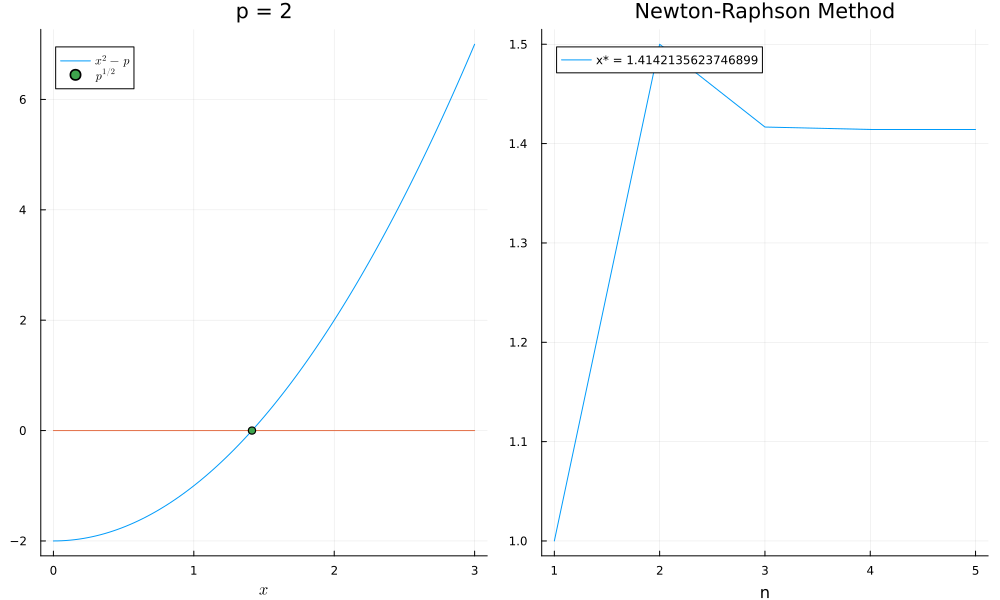

In [7]:
plot1 = plot(x,f.(x), label = L"x^2 - p", title = "p = $(p)", xlabel = L"x")
plot!(x,zeros(100), label = false)
scatter!([sqrt(2)],[0], label = L"p^{1/2}")

plot2 = plot(1:n,values,label = "x* = $(values[end])", title = "Newton-Raphson Method", xlabel = "n")
plot(plot1,plot2,layout = (1,2),size=(1000,600))

b) Show that this method is a particular case of the fixed point iteration method

Due to the form of the Newton-Raphson method, we can write the iteration as

$$ x_{n+1} = g(x_n)$$

Such that 

$$ g(x) = x - \frac{x^2 - p}{2x} = \frac{x^2 +p}{2x} $$

We have that

$$ |g(u) - g(v)| = |\frac{u^2+p}{2u} - \frac{v^2+p}{2v}| = \frac{|u-v||uv-p|}{2|uv|} = \beta|u-v| $$

Such that

$$ \beta =  \frac{1}{2} |\frac{uv-p}{uv}|$$

We notice that $\beta < 1$ if

$$ -1 < \frac{1}{2} \frac{uv - p}{uv} < 1 \quad \forall u,v$$

### I) 

$$ uv - p < 2uv $$

$$ -p < uv \quad \forall u,v$$

### II)

$$ -2uv < uv - p $$

$$ \frac{p}{3} < uv \quad \forall u,v \in \mathcal{R} $$

We have therefore that a sufficient interval for which we have convergence, is

$$ \frac{p}{3} < uv = x^2 < \forall u,v \in \mathcal{R} $$

$$ \sqrt{\frac{p}{3}} < x < \infty$$

In [8]:
### Functions
function g(x)
    return (x^2 + p)/(2*x)
end

function g_(x)
    return (x^2 - p) / (2*x^2)
end

### Parameters
n = 20          ### Number of Iterations
x0 = .5         ### Initial guess
k = .9        ### k-contraction Parameter

### Memory Alocation
x = range(0,10,100)
values = zeros(n)

### Fix-Point Iteration
values[1] = x0
for q in 1:n-1
    values[q+1] = g(values[q])
end

### Error Estimation
Ε = abs.( sqrt(p) .- values)
sup = abs(values[2] - values[1]) * k.^(1:n) ./ (1-k)

println("Number of iterations: $(n)")
println("Initial value x0: $(x0)")
println("Best approximation: $(values[end])")

Number of iterations: 20
Initial value x0: 0.5
Best approximation: 1.414213562373095


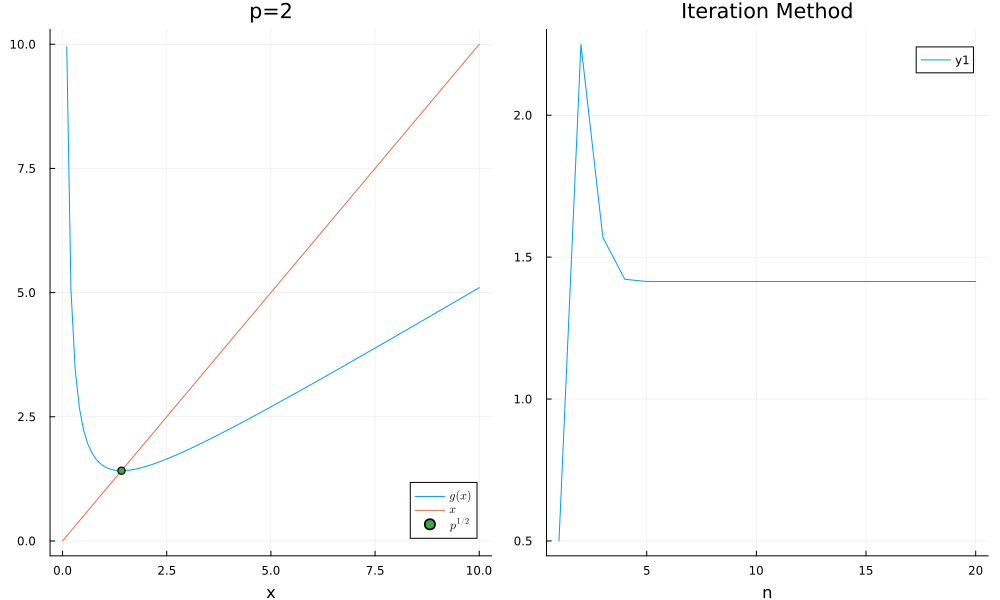

In [9]:
plot1 = plot(x,g.(x) , xlabel = "x" , label = L"g(x)",title = "p=$(p)")
plot!(x,x , label = L"x")
scatter!([sqrt(p)],[sqrt(p)],label = L"p^{1/2}")

plot2 = plot(1:n,values,xlabel="n",title="Iteration Method")
plot(plot1,plot2,layout=(1,2),size=(1000,600))

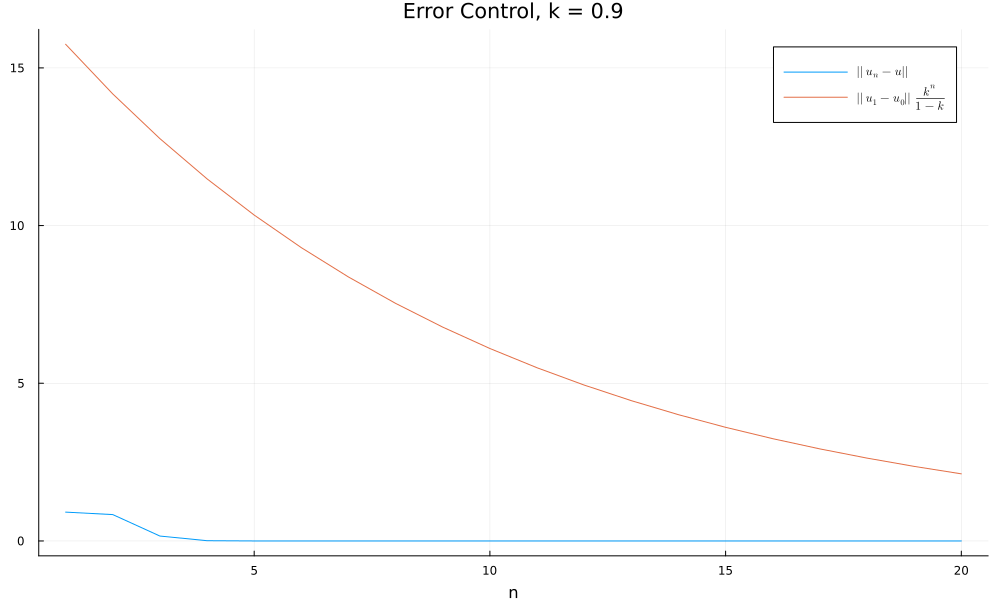

In [10]:
plot(1:n,Ε,label=L"||u_n - u||",size=(1000,600),xlabel="n",title="Error Control, k = $(k)")
plot!(1:n,sup,label=L"||u_1 - u_0|| \frac{k^n}{1-k}")

# Exercice III

Consider the integral

$$ f(x) = x + \lambda \int_{0}^{\pi/2} f(y)cos(x)dy, \quad 0 \leq x \leq \pi/2, \quad \lambda = \frac{1}{4}$$

which we notice that 

* The function x is continuous in the interval $[0,\pi/2]$

* The function $F(x,y) = f(y)cos(x)$ is continuous in the interval $[0,\pi/2]$

* The partial derivative $F_f(x,y) = cos(x) \leq C=1$ is continuous and bounded in the interval $[0,\pi/2]$

* The inequality holds

$$ |\lambda| < \frac{1}{(b-a) C} $$

a) Show that this equation has a unique solution in $C[0,\pi/2]$

Since all the hipothesis hold, by the Banach Fixed-Point Theorem the integral equation has a unique solution which can be approached by the iteration

$$ f_{n+1}(x) = x + \lambda \int_{0}^{\pi/2} f_{n}(y)cos(x)dy, \quad 0 \leq x \leq \pi/2, \quad \lambda = \frac{1}{4} $$

with a given initial function

$$ f_0(x) = f(x) = x $$

We have that

$$ f_1(x) = x + \lambda cos(x)\int_{0}^{\pi/2} ydy = x + cos(x) \frac{\pi^2}{8} \lambda $$

$$ f_2(x) = x + \lambda cos(x) \int_{0}^{\pi/2} (y + \frac{\pi^2}{8} \lambda cos(y))dy = x + cos(x) \frac{\pi^2}{8}\lambda(1+\lambda)$$

$$ f_3(x) = x + \lambda cos(x) \int_{0}^{\pi/2} f_2(y) dy = x + cos(x) \frac{\pi^2}{8}\lambda(1 +\lambda(1+\lambda))$$

More generaly

$$ f_n(x) = x + \lambda cos(x) A(n), \quad A(n) = \lambda\frac{\pi^2}{8}(1+\lambda(1+\lambda(1+...))) $$

We have that

$$ f_n(x) \rightarrow f(x), \quad A(n) \rightarrow \frac{\lambda \pi^2}{8(1-\lambda)},  \quad n \rightarrow \infty$$

Therefore

$$ f(x) = x + \frac{\lambda \pi^2}{8(1-\lambda)} cos(x) $$

In [11]:
### Functions Definitions
function Area(h,y)
    return (2*sum(y) -(y[1] + y[end]))* h/2
end

function f0(x)
    return x
end

function f(x,λ)
    return x + cos(x) * λ * pi^2 / (8*(1-λ)) 
end

### Parameters
n = 100
points = 100
λ = .25
x = range(0,pi/2,points)
h = x[2] - x[1]

### Memory Alocation
Iter = zeros(n,points)
Ε = zeros(n,points)

### Fix point Iteration
Iter[1,:] = f0.(x)
for q in 1:n-1
    Iter[q+1,:] .= x .+ λ .* Area(h,Iter[q,:]) .* cos.(x)
end

### Error Calculation
Ε .= abs.(Iter .- transpose(f.(x,λ)))

100×100 Matrix{Float64}:
 0.411234     0.411182     0.411026     …  0.0130476    0.00652462   0.0
 0.102808     0.102795     0.102757        0.0032619    0.00163115   0.0
 0.0257037    0.0257005    0.0256908       0.000815526  0.000407814  0.0
 0.00642795   0.00642714   0.00642471      0.000203946  0.000101986  0.0
 0.00160911   0.00160891   0.0016083       5.10538e-5   2.55301e-5   0.0
 0.000404426  0.000404375  0.000404222  …  1.28316e-5   6.41661e-6   0.0
 0.000103261  0.000103248  0.000103209     3.27627e-6   1.63834e-6   0.0
 2.79716e-5   2.79681e-5   2.79575e-5      8.87481e-7   4.43797e-7   0.0
 9.1496e-6    9.14845e-6   9.14499e-6      2.90298e-7   1.45167e-7   0.0
 4.44419e-6   4.44363e-6   4.44196e-6      1.41005e-7   7.05114e-8   0.0
 ⋮                                      ⋱                            
 2.87577e-6   2.87541e-6   2.87432e-6      9.12422e-8   4.56269e-8   0.0
 2.87577e-6   2.87541e-6   2.87432e-6      9.12422e-8   4.56269e-8   0.0
 2.87577e-6   2.87541e-6   2.

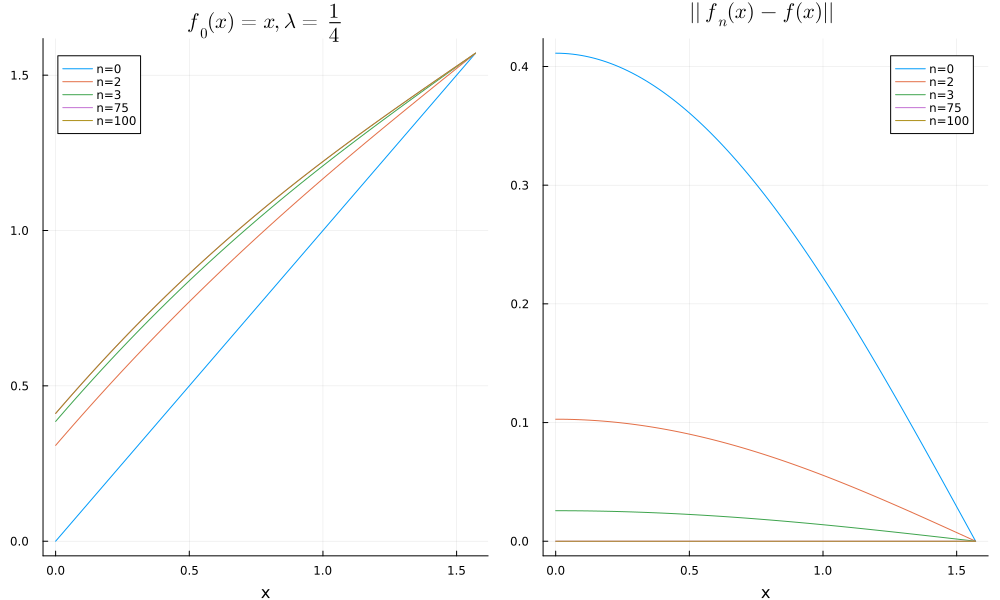

In [12]:
plot1 = plot(x,Iter[1,:],label="n=$(0)",title=L"f_0(x)=x, \lambda = \frac{1}{4}")
plot!(x,Iter[Int(2),:],label="n=$(2)")
plot!(x,Iter[Int(3),:],label="n=$(3)")
plot!(x,Iter[Int(3*n/4),:],label="n=$(Int(3*n/4))")
plot!(x,Iter[Int(n),:],label="n=$(n)")

plot2 = plot(x,Ε[1,:],label="n=$(0)",title=L"|| f_n(x) - f(x) ||")
plot!(x,Ε[Int(2),:],label="n=$(2)")
plot!(x,Ε[Int(3),:],label="n=$(3)")
plot!(x,Ε[Int(3*n/4),:],label="n=$(Int(3*n/4))")
plot!(x,Ε[Int(n),:],label="n=$(n)")

plot(plot1,plot2,size=(1000,600),xlabel="x")

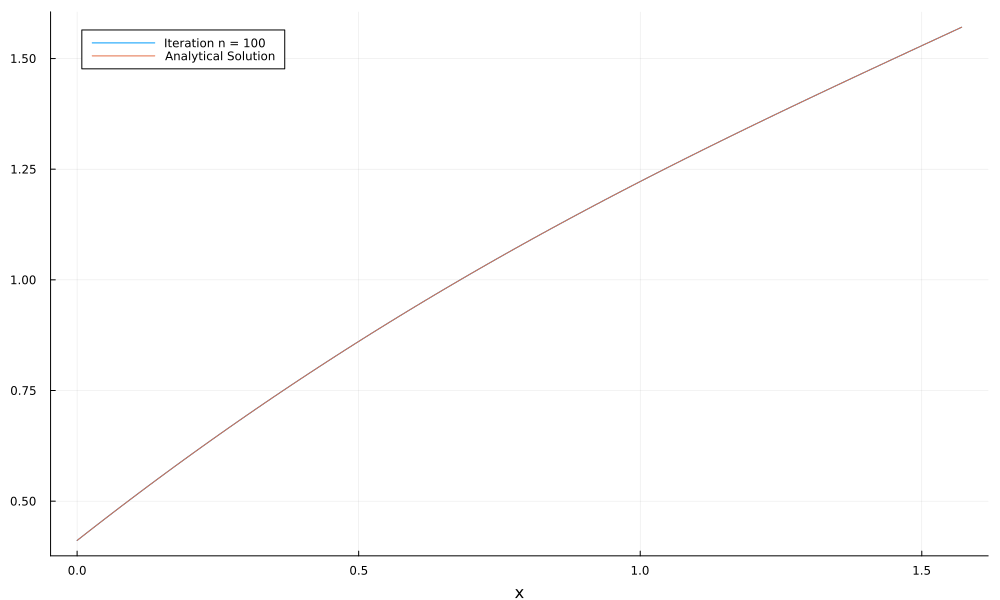

In [13]:
plot(x,Iter[end,:],label="Iteration n = $(n)",size=(1000,600),xlabel="x")
plot!(x, f.(x,λ),label = "Analytical Solution" )

# Exercice IV

The ODE

$$ x^{\prime}(t) = 2(x(t) + 1)$$
$$ x(0) = 0$$

has solution

$$ x(t) = e^{2t} - 1 $$

We can approach the same solution by the method of sucessive iterations. We have that

$$ x_n(t) = x_0(t) + 2 \int_{0}^{t}(x(s)+1)ds $$
$$ x_0(t) = 0 $$
$$ x_1(t) = 2 \int_{0}^{t} (0+1)ds = 2t$$
$$ x_2(t) = 2 \int_{0}^{t}(2s+1)ds = 2(t^2+t)$$
$$ x_3(t) = 2 \int_{0}^{t} (2(s^2+s)+1)ds = \frac{(2t)^3}{3!} + \frac{(2t)^2}{2} + 2t$$
$$ x_4(t) = 2 \int_{0}^{t} (2(\frac{(2s)^3}{3!} + \frac{(2s)^2}{2} + 2s)+1)ds = \frac{(2t)^4}{4!} + \frac{(2t)^3}{3!} + \frac{(2t)^2}{2} + 2t$$

Generaly:

$$ x_n(t) = \sum_{j=0}^{n} \frac{(2t)^j}{j!} $$

We have that

$$ x_n(t) \rightarrow e^{2t} - 1 ,\quad n \rightarrow \infty $$
